<h1 style="text-align:center;">Correlation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>A correlation analysis computes the correlation coefficient (r).</p>
<p>r is one number, that shows the linear relationship between two variables.</p>
<p>r is standardized, it goes from -1 to 1. -1 means a perfect inverse relationship, 1 means a perfect correlation, 0 means no relation. </p>
<p>Correlation is not causation.</p>

<h1 style="text-align:center;">Covariance</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p>Correlation coefficient is covariance coefficient normalized.</p>
<p>Covariance is the same scale and same dimension as the data. Correlation is dimensionless.</p>
<p>We calculate covariance as:</p>

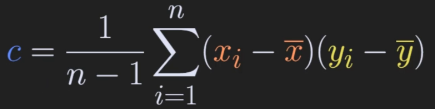

<p>And correlation as:</p>

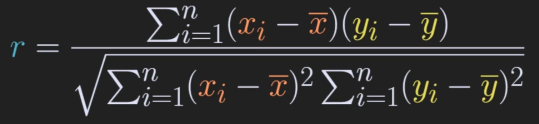

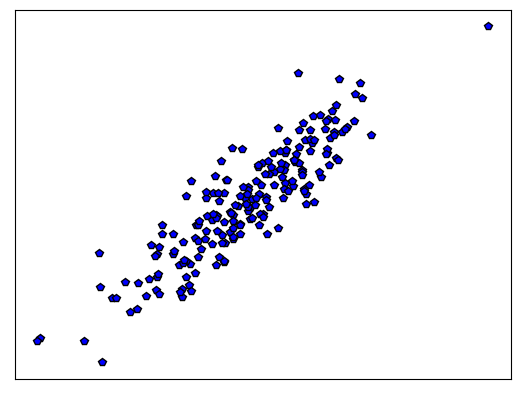

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

N = 200
x = np.random.randn(N)
y = np.random.randn(N)*.5 + x

plt.plot(x,y,'kp',markerfacecolor='b',markersize=6)
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:
# compute covariance
# method 1
meanX = np.mean(x)
meanY = np.mean(y)

covar1 = 0
for i in range(N):
    covar1 += (x[i]-meanX)*(y[i]-meanY)
covar1 = covar1/(N - 1)

# method 2
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N - 1)

# method 3
covar3 = np.cov(np.vstack((x,y)))

covar = [covar1, covar2, covar3]

for i in range(len(covar)):
    print(f'covar{i+1}: {covar[i]}')

covar1: 0.9662320631659373
covar2: 0.9662320631659376
covar3: [[0.96629687 0.96623206]
 [0.96623206 1.21171091]]


In [23]:
# compute correlation

# method 1
correlationNumerator   = sum( (x-meanX) * (y-meanY) )
correlationDenominator = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = correlationNumerator / np.sqrt(correlationDenominator)

# method 2
corr2 = np.corrcoef(np.vstack((x,y)))

corr = [corr1,corr2]
for i in range(len(corr)):
    print(f'corr{i+1}: {corr[i]}')

corr1: 0.8929489891915595
corr2: [[1.         0.89294899]
 [0.89294899 1.        ]]
